# About

This Jupyter Notebook contains the A* code used to preprocess the distances between all the nodes in the "params/distance_params.yaml" file using the map "map/hospital_map.yaml".
This value is calculated as a pixel distance between 2 nodes and stored in distance matrix. Further, this is converted into metiric distance (one pixel has dimensions 5cm x 5cm) and stored in the "params/distNew.txt" file.

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import yaml
import os   

In [22]:
PATH = os.getcwd()
PATH = PATH[:-3]
with open(PATH+"param/distance_params.yaml", 'r') as file1:
    points= yaml.safe_load(file1)

with open(PATH+"map/hospital_map.yaml", 'r') as file2:
    map_desc = yaml.safe_load(file2)

img = cv2.imread(PATH+"map/hospital_map.pgm")

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

obs = np.asarray(img2)
obs = obs*(100/255)

In [23]:
nodes = {}
origin = [obs.shape[0]+int(map_desc["origin"][1]/map_desc["resolution"]), obs.shape[1]+int(map_desc["origin"][0]/map_desc["resolution"])]

for x in points["world_nodes"]:
    nodes[x] = np.array([origin[0] - int(int(points["world_nodes"][str(x)]["y"])/map_desc["resolution"]),origin[1]+int(int(points["world_nodes"][str(x)]["x"])/map_desc["resolution"])])

In [24]:
finalMatrix = np.full([22,22],-1)
strToInd = {}
z=0
for i in nodes:
    strToInd[i]=z
    z+=1


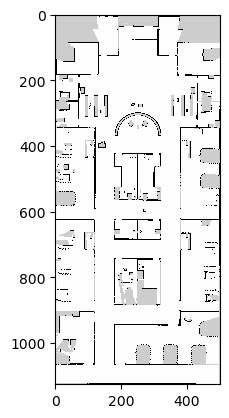

end 0
[0] [0]


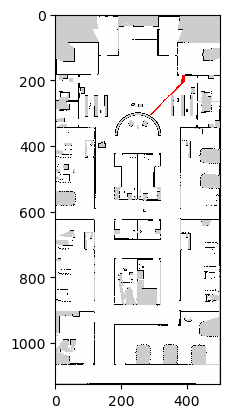

end 120
[0] [1]


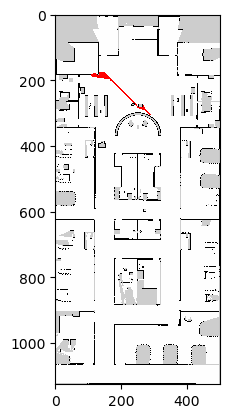

end 181
[0] [2]


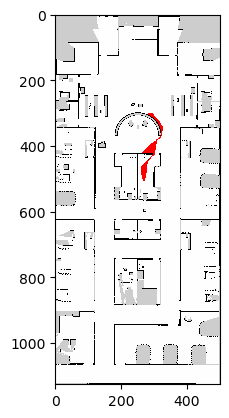

end 200
[0] [3]


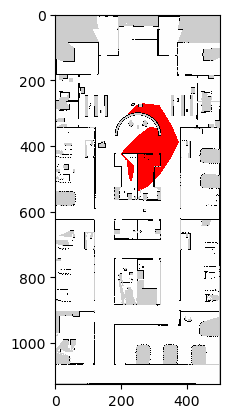

end 265
[0] [4]


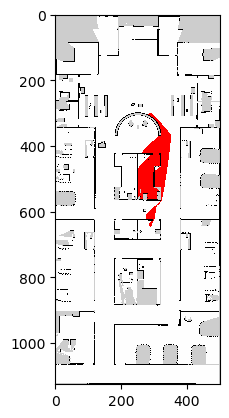

end 340
[0] [5]


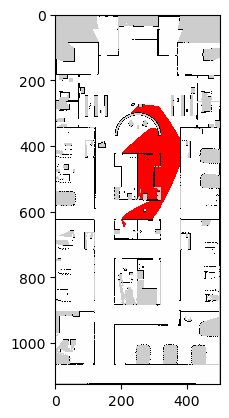

end 403
[0] [6]


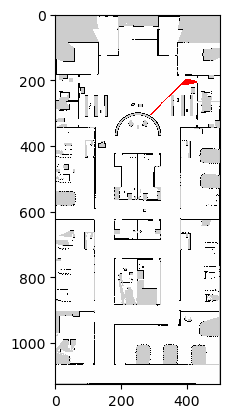

end 140
[0] [7]


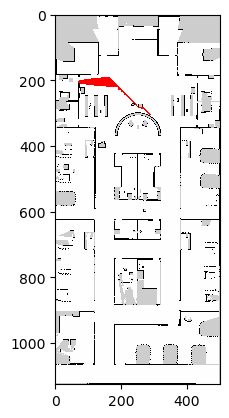

end 221
[0] [8]


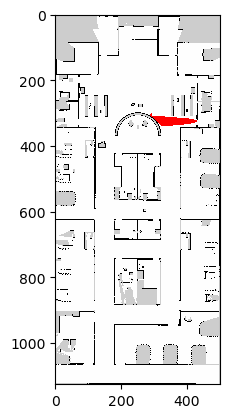

end 140
[0] [9]


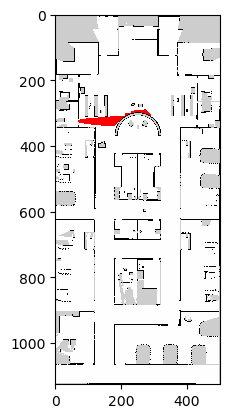

end 220
[0] [10]


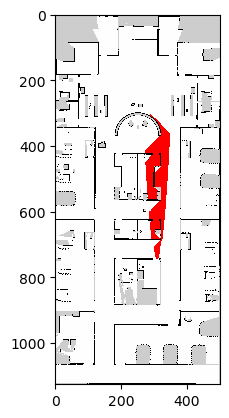

end 440
[0] [11]


In [25]:
red = [255,0,0]
blue = [0,255,0]
green = [0,0,255]
X = obs.shape[0]-1
Y = obs.shape[1]-1

def getH(curr,end):
    return((curr[0]-end[0])**2+(curr[1]-end[1])**2)**0.5

def getNext(opened, M):
    tar = [0,M[opened[0][0]][opened[0][1]][0]] 
    for enum in enumerate(opened):
        if M[enum[1][0]][enum[1][1]][0]<tar[1]:
            tar = [enum[0], M[enum[1][0]][enum[1][1]][0]]
    return tar[0]

def tracePath(start, end, M):
    marker = end
    while not np.equal(marker, start):
        map[marker[0]][marker[1]] = blue
        marker = [M[marker[0]][marker[1]][2],M[marker[0]][marker[1]][3]]


def aStar(start, end):
    if (finalMatrix[strToInd[start]][strToInd[end]] !=-1):
        return
    else:
        map=np.copy(img) 

        map[nodes[start][0]][nodes[start][1]] = [255,255,0]
        map[nodes[end][0]][nodes[end][1]] = [255,255,0]

        opened = [nodes[start]]

        M = np.full((obs.shape[0], obs.shape[1],4), fill_value=-1)
        M[nodes[start][0]][nodes[start][1]] = [getH(nodes[start], nodes[end]), 0, -1, -1]
        i = 0

        while len(opened):
            curr = opened.pop(getNext(opened, M))
            if np.array_equal(curr, nodes[end]):
                plt.imshow(map)
                plt.show()
                print("end", M[nodes[end][0]][nodes[end][1]][1])
                print([strToInd[start]], [strToInd[end]])
                finalMatrix[strToInd[start]][strToInd[end]] = M[nodes[end][0]][nodes[end][1]][1]

                break
            
            else:
                for i in range(-1,2):
                    for j in range(-1,2):
                        if curr[0]+i<X and curr[0]+i>0 and curr[1]+j<Y and curr[1]+j>0 and M[curr[0]+i][curr[1]+j][0]==-1 and obs[curr[0]+i][curr[1]+j]>95:
                            opened.append([curr[0]+i, curr[1]+j])
                            M[curr[0]+i][curr[1]+j][2] = curr[0]
                            M[curr[0]+i][curr[1]+j][3] = curr[1]

                            M[curr[0]+i][curr[1]+j][1] = M[curr[0]][curr[1]][1]+1
                            M[curr[0]+i][curr[1]+j][0] = M[curr[0]+i][curr[1]+j][1]+getH([curr[0]+i, curr[1]+j], nodes[end])

                            map[curr[0]+i][curr[1]+j] = red
for i in nodes:
    for j in nodes:
        aStar(i,j)

cv2.destroyAllWindows()


    

In [ ]:
finalMatrix = np.asarray(finalMatrix)
print(finalMatrix)

saveMatrix = finalMatrix*0.05
np.savetxt(PATH+"params/distNew.txt", saveMatrix)

[[  0 120 181 200 265 340  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
   -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
   -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
   -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
   -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
   -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
   -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
   -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
   -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
   -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
   -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1 